In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
orig_img = cv2.cvtColor(cv2.imread("./original_datas/IMG_0272_0155_resize.jpeg"), cv2.COLOR_BGR2RGB)
mask_img = cv2.imread("./iris_mask/eyes_lips_iris_mask.jpg", 0)
print(mask_img.shape)

(1024, 1024)


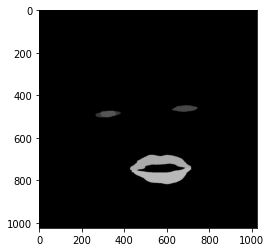

In [6]:
plt.imshow(mask_img, cmap="gray")

In [90]:
table = {'l_eye': 4, 'r_eye': 5, 'l_iris': 6, 'r_iris': 7, 'u_lip': 12, 'l_lip': 13}

In [91]:
color = np.zeros_like(orig_img)
for i in range(mask_img.shape[0]):
    for j in range(mask_img.shape[1]):
        if mask_img[i, j] == table['l_eye']:
            color[i, j] = 255
        elif mask_img[i, j] == table['r_eye']:
            color[i, j] = 255
        elif mask_img[i, j] == table['l_iris'] or mask_img[i, j] == table['r_iris']:
            if (orig_img[i, j, 0]+orig_img[i, j, 1]+orig_img[i, j, 2])/3 > 100:
                color[i, j] = 255
            else:
                color[i, j, 0] = 0
                color[i, j, 1] = 70
                color[i, j, 2] = 255
        elif mask_img[i, j] == table['u_lip'] or mask_img[i, j] == table['l_lip']:
            color[i, j, 0] = 255
            color[i, j, 1] = 79
            color[i, j, 2] = 140
        else:
            pass

/Users/iwabuchi/.pyenv/versions/py3.7.3_torch/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  if __name__ == '__main__':


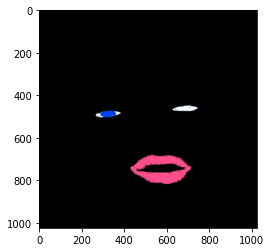

In [92]:
cv2.imwrite("final_view.jpeg", cv2.cvtColor(color.astype(np.uint8), cv2.COLOR_RGB2BGR))
plt.imshow(color.astype(np.uint8))